# Telco Customer Churn

It is important for a organization to keep their customer with them as longer as they can and this is called customer retention. The minute a customer leaves, the organization has a loss. To mitigate this situation, nowadays organizations are interested in identifying customers with a high probabibity of leaving before they actually leave. This way they will be able to stratergize their retention plans. 

This project is to address this concern. As the dataset, we use Telco Customer Churn dataset from Kaggle.

Telco Customer Churn data set has information about a fictional Telco company in California in third quarter of a year. This company provides homephone and Internet services and data has 7043 records with 21 features. 

We attempt to solve the followin business challenges:

   1. What is the likelihood of an active customer leaving the organization?
   2. What are the key indicators of the customer churn?

#### Import Relevant Libraries

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [4]:
#! pip install plotnine[all]

In [5]:
from plotnine import ggplot, aes, geom_point, facet_wrap, geom_bar, facet_grid

In [6]:
print(print(os.getcwd()))

C:\Users\waruni\OneDrive - Iowa State University\Documents\Customer Churn Project
None


#### Import Data

In [7]:
df = pd.read_csv("Telco_Customer_Churn.csv")

In [8]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [9]:
df.shape

(7043, 21)

#### Data Wrangling 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


"Total Charges" field is object, but it should be numerical. 

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#check for missing values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


'TotalCharges' field seem to have 11 missing values. Few options are,
1. Delete the entire column: we will lose important information.
2. Delete rows containing missing data: 11/7043 rows will have to be deleted. 
3. Imputation: fill the values with a certain number: mean\median if the field is numerical, most occured entry if the field is categorical.

In [13]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
df[df['tenure']==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

It looks like all rows with missing total charges are associated with customers who have requested for services very recently because their tenure is equal to zero. 

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
#check for duplicates: None
df.duplicated().sum()

0

In [17]:
#Only work for numerical variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


We do not need "cutomerID" and "gender" fields as they will not be using for further analysis.

In [18]:
df.drop('customerID', inplace=True, axis=1)
df.drop('gender', inplace = True, axis=1)

In [19]:
df.head().T

,0,1,2,3,4
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No
DeviceProtection,No,Yes,No,Yes,No


In [20]:
#unique values of some of the categorical variables
print("Multiple Lines:")
print(*list(df.MultipleLines.unique()))
print("Internet Service:")
print(*list(df.InternetService.unique()))
print("Contract:")
print(*list(df.Contract.unique()))
print("Payment Method:")
print(*list(df.PaymentMethod.unique()))

Multiple Lines:
No phone service No Yes
Internet Service:
DSL Fiber optic No
Contract:
Month-to-month One year Two year
Payment Method:
Electronic check Mailed check Bank transfer (automatic) Credit card (automatic)


#### Data Exploration 

In [21]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [22]:
df['PhoneService'].value_counts(normalize=True)

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64

In [23]:
df['InternetService'].value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

In [24]:
df['Contract'].value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

High percent of customers in the dataset use phone service. Also, nearly 78% of customer use internet throgh this company. Internet using Fiber optic seem to have high popularity than DSL connection. Most customers appear to be using month-to-month contract for the services they purchase through this company.

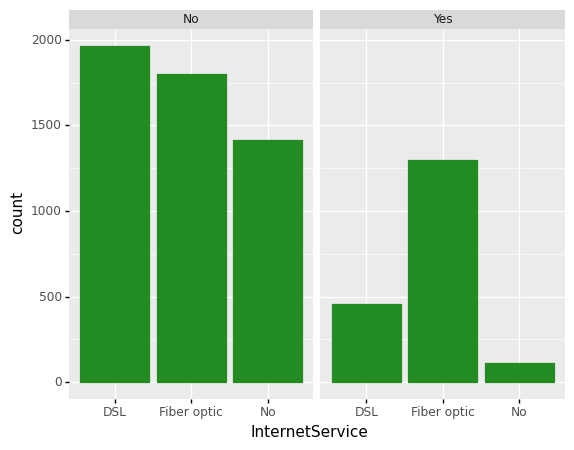

<ggplot: (170078681354)>

In [25]:
ggplot(data =df) + aes(x='InternetService') +  geom_bar(colour='forestgreen', fill ='forestgreen') +facet_wrap('Churn')


Customers have three options with internet service: they can use DSL, Fiber Optic, or not have this service at all. When looking at the customer counts who have churned, most of them have use Fiber Optic to have the internet service throug this organization. Yet, when it comes to the customers who have not churned most number of them are using DSL to use internet service. 

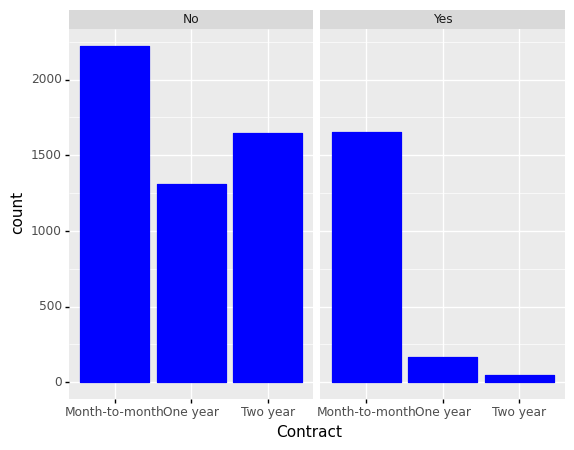

<ggplot: (170079253255)>

In [26]:
ggplot(data =df) + aes(x='Contract') +  geom_bar(colour='Blue', fill ='Blue') +facet_wrap('Churn')

Difference between the number of customers, who did churn and did not, when using the month-to-month contract is considerably low when comparing with other two contract method. Within the customer group who left higher number of customers were using month-to-month contract while lower number of them have used two-year contract. At the same time, within the customer group who stayed, most of them have used month-to-month contracts and low number of them have used one-year contract.

<Figure size 1440x720 with 0 Axes>

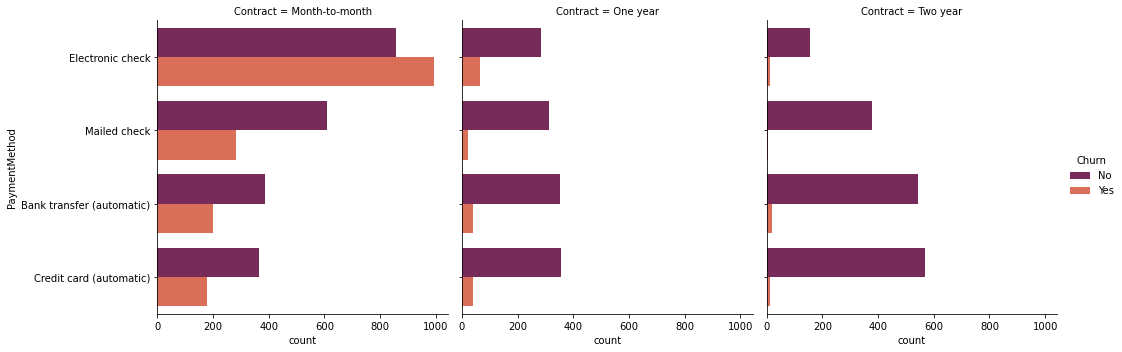

In [27]:
plt.figure(figsize=(20, 10))
sns.catplot(y="PaymentMethod", hue="Churn", kind = "count",col="Contract", orient='h', data = df, palette='rocket')
plt.show()

Using electronic check to pay for the services seem to be a popular method among the customers. One interesting observation here is that, of those who were in month-to-month contract and were paying using electronic checks, high percentage of customers have left the services.

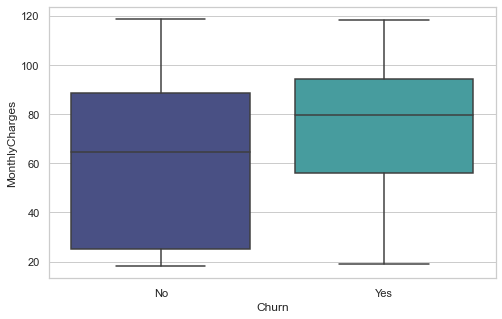

In [28]:
plt.figure(figsize=(8, 5))
sns.set(style='whitegrid')
sns.boxplot(x="Churn", y= "MonthlyCharges", data = df, palette="mako")
plt.show()

Monthly charge distribution of the churned group is slightly left skewed while the monthly charge distribution of not-churned group has a right-skewed distribution. Customers who did not churn has a lower monthly charge median. Next, we will look at monthly charge distrbution among different contract types and churn status. 

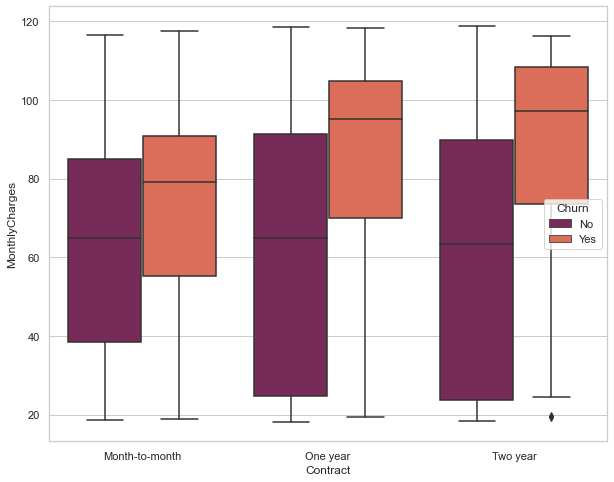

In [29]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Contract", y="MonthlyCharges", hue="Churn", data = df, palette="rocket")
plt.show()

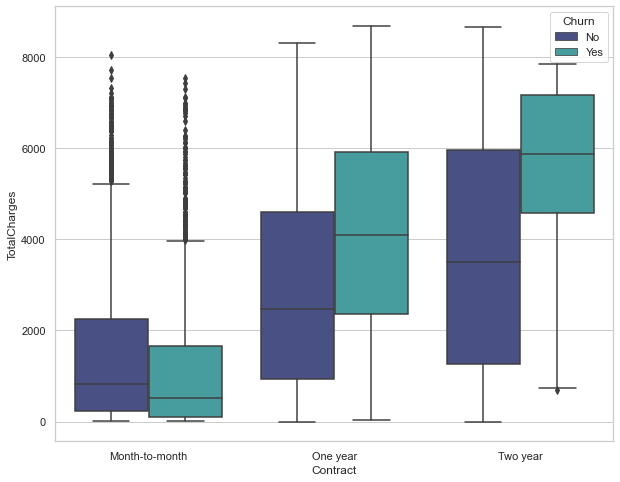

In [30]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Contract", y="TotalCharges", hue="Churn", data = df, palette="mako")
plt.show()

Total charge distribution of customers who were in month-to-month contract is right skewed regardless of the fact that the customer churn or not. However, median total charge amount of churned customers is low in the month-to-month contract, while in the other two contract methods it is higher than that of not-churned customers.

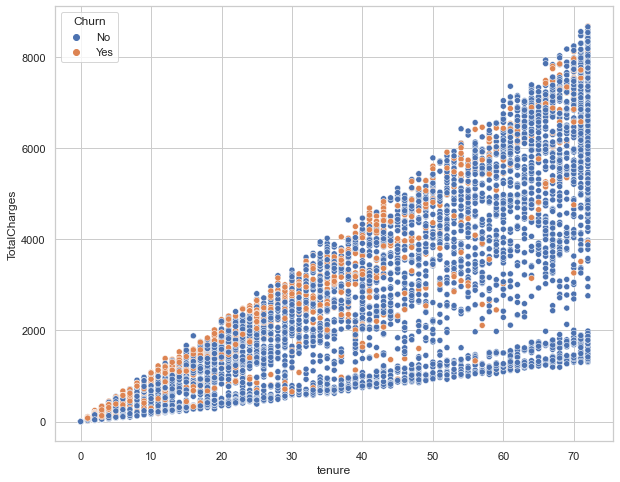

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="tenure", y="TotalCharges", hue= "Churn", data = df)
plt.show()

Higher the months of services the customers have taken, higher the range of total charges. It looks like most customers who churned has had the their total charge close to the upper limit.  

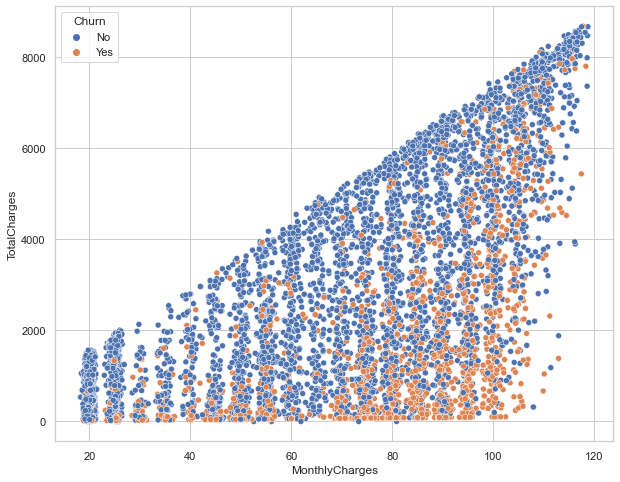

In [32]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", hue= "Churn", data = df)
plt.show()

As the monthly charge increase, total charge also increase. Customer who churned are mostly clustered with a high monthly charge.

In [33]:
df[["MonthlyCharges", "TotalCharges", "tenure"]].corr()

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.651174,0.247900
TotalCharges,0.651174,1.000000,0.826178
tenure,0.247900,0.826178,1.000000


Looking at pairwise correlation coefficients for tenure, monthly charges, and total charges, it can be observed that tenure and total charges are highly correlated. Also monthly charges and total charges are somewaht correlated eventhough not as much as total charges with tenure.

Considering the collinearities between these variables, I believe it would be reasonable to choose just tenure and monthly charges variables for the modeling part.

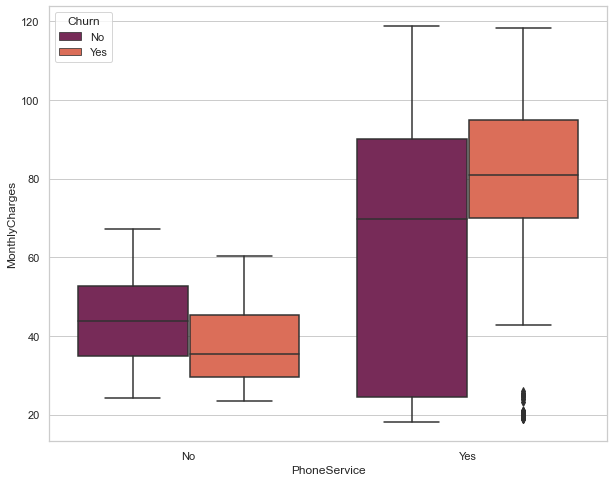

In [34]:
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
sns.boxplot(x="PhoneService", y= "MonthlyCharges", hue= "Churn", data = df, palette="rocket")
plt.show()

Monthly charge distribution of customers who did not churn has a high range regardless of the phone service status. Median monthly charge of churned customers is lower than that of not-churned customers, when they have not used the phone service. With the customers who have used the phone service, it is the other way around. 

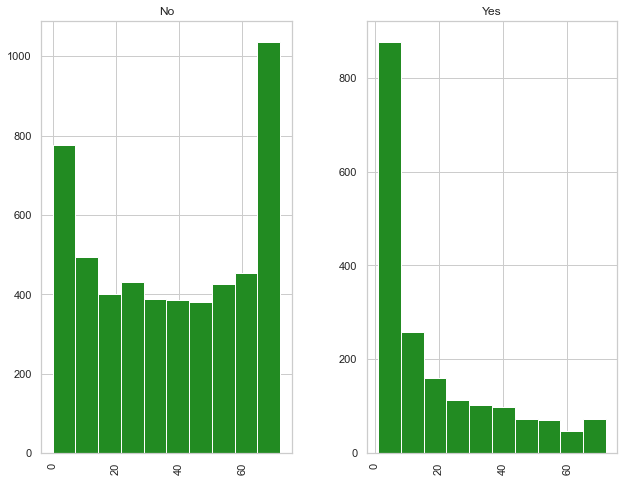

In [35]:
df['tenure'].hist(by=df['Churn'], figsize=(10,8), color='forestgreen')
plt.show()

Among the customer who churned, most have started receiving service from this company very recently, meaning their tenure is low. Out of all customers who did not churn, highest number of them have received service for more than 60 months.  

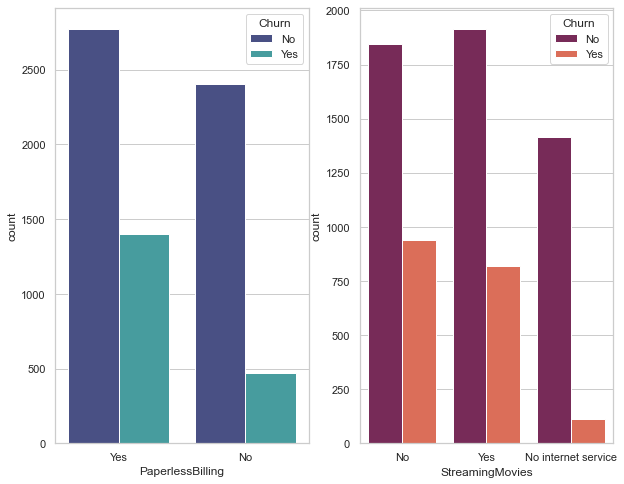

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10, 8))
sns.countplot(x="PaperlessBilling",hue="Churn", data = df, palette="mako", ax=ax[0])
sns.countplot(x="StreamingMovies",hue="Churn", data = df, palette="rocket", ax=ax[1])
plt.show()

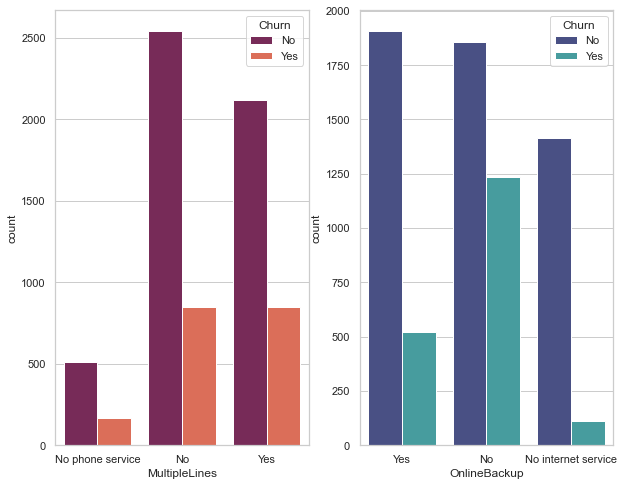

In [37]:
fig, ax = plt.subplots(1,2, figsize=(10, 8))
sns.countplot(x="MultipleLines",hue="Churn", data = df, palette="rocket", ax=ax[0])
sns.countplot(x="OnlineBackup",hue="Churn", data = df, palette="mako", ax=ax[1])
plt.show()

In [38]:
ct = pd.crosstab(df.Churn, df.Partner, margins = True) 
ct.columns=["No Partner", "Partner", "Row Total"]
ct.index=["No Churn", "Churn", "Col Total"]
print(ct.div(ct["Row Total"], axis = 0))

           No Partner   Partner  Row Total
No Churn     0.471782  0.528218        1.0
Churn        0.642055  0.357945        1.0
Col Total    0.516967  0.483033        1.0


Most of the customers who churned has had no partners wheras most of the customers who did not churn has had partners implying that there is a high probablity that a customer churn if he/she does not have partner.

In [39]:
ct = pd.crosstab(df.Churn, df.Dependents, margins = True) 
ct.columns=["No Dependent", "Dependent", "Row Total"]
ct.index=["No Churn", "Churn", "Col Total"]
print(ct.div(ct["Row Total"], axis = 0))

           No Dependent  Dependent  Row Total
No Churn       0.655199   0.344801        1.0
Churn          0.825575   0.174425        1.0
Col Total      0.700412   0.299588        1.0


In [40]:
ct = pd.crosstab( df.Churn, df.SeniorCitizen, margins = True) 
ct.columns=["No Senior Citizen", "Senior Citizen", "Row Total"]
ct.index=["No Churn", "Churn", "Col Total"]
print(ct.div(ct["Row Total"], axis = 0))

           No Senior Citizen  Senior Citizen  Row Total
No Churn            0.871279        0.128721        1.0
Churn               0.745318        0.254682        1.0
Col Total           0.837853        0.162147        1.0


Majority of the customers have had no dependents and not senior citizens.

In [41]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

This implies that we have an imbalanced dataset here. Majority of the records (about 73% of the records) belong to the customers who did not churn.

#### Statistical Analysis: Chi Square Tests to check the independence between categorical variables

In [42]:
#churn percentage by Internet Service. To get percentage by column, do normalize ='column'. For total percentage, do normalize = 'all'
contingency = pd.crosstab(df['InternetService'], df['Churn'], normalize = 'index')
contingency

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


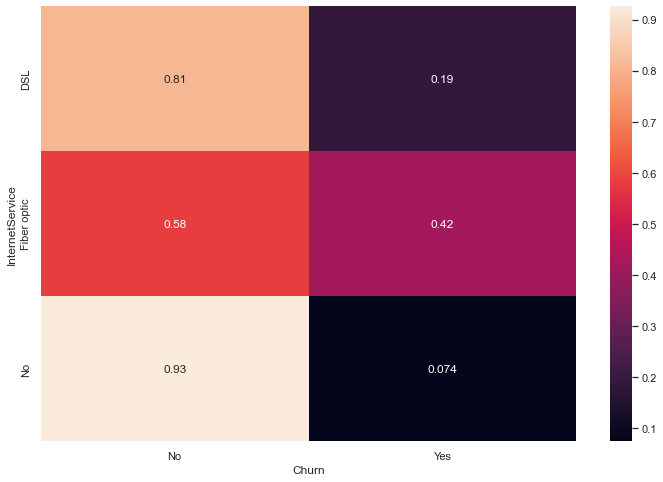

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True)
plt.show()

In [44]:
#chi-square test for independence: Internet Service & Churn
c,p, dof, expected =chi2_contingency(contingency)
significance_level = 0.05
print('p value:' +str(p))
if p<=significance_level:
    print('Reject NULL, implying that two variables are not independent')
else:
    print('Accept NULL. Conclusion is two variables are independent ')

p value:0.8391850030004063
Accept NULL. Conclusion is two variables are independent 


In [45]:
#chi-square test for independence: Online Backup & Churn
contingency = pd.crosstab(df['OnlineBackup'], df['Churn'], normalize = 'index')
c,p, dof, expected =chi2_contingency(contingency)
significance_level = 0.05
print('p value:' +str(p))
if p<=significance_level:
    print('Reject NULL, implying that two variables are not independent')
else:
    print('Accept NULL. Conclusion is two variables are independent ')

p value:0.8603755865644523
Accept NULL. Conclusion is two variables are independent 


In [46]:
#chi-square test for independence: Payment Method & Churn
contingency = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize = 'index')
c,p, dof, expected =chi2_contingency(contingency)
significance_level = 0.05
print('p value:' +str(p))
if p<=significance_level:
    print('Reject NULL, implying that two variables are not independent')
else:
    print('Accept NULL. Conclusion is two variables are independent ')

p value:0.9539277015457
Accept NULL. Conclusion is two variables are independent 


In [47]:
#chi-square test for independence: Contract & Churn
contingency = pd.crosstab(df['Contract'], df['Churn'], normalize = 'index')
c,p, dof, expected =chi2_contingency(contingency)
significance_level = 0.05
print('p value:' +str(p))
if p<=significance_level:
    print('Reject NULL, implying that two variables are not independent')
else:
    print('Accept NULL. Conclusion is two variables are independent ')

p value:0.749982984873135
Accept NULL. Conclusion is two variables are independent 


In [48]:
#chi-square test for independence: Payment Method & Churn
contingency = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize = 'index')
c,p, dof, expected =chi2_contingency(contingency)
significance_level = 0.05
print('p value:' +str(p))
if p<=significance_level:
    print('Reject NULL, implying that two variables are not independent')
else:
    print('Accept NULL. Conclusion is two variables are independent ')

p value:0.9539277015457
Accept NULL. Conclusion is two variables are independent 


#### Statistical Analysis: Hypothesis Tests to compare the means of two independent groups 

#### Monthly Charges and Churn 

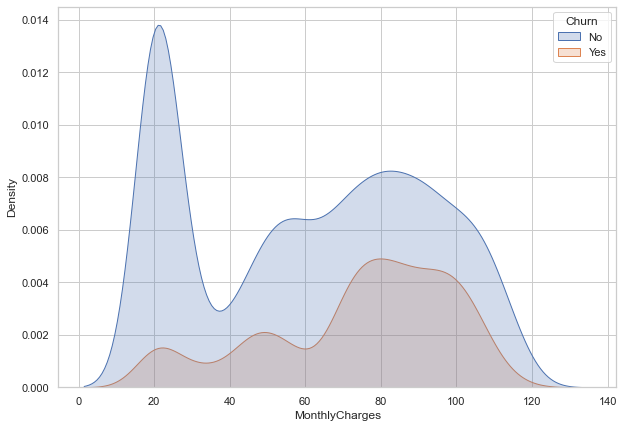

In [49]:
plt.figure(figsize=(10,7))
sns.kdeplot(x='MonthlyCharges', hue='Churn',data = df, shade= True)
plt.show()

In [50]:
from scipy.stats import ttest_ind
df1 = df[df['Churn']=='No']
df2 = df[df['Churn']=='Yes']
print("Mean Monthly Charge of Not-Churned:", df1.MonthlyCharges.mean())
print("Mean Monthly Charge of Churned:", df2.MonthlyCharges.mean())

Mean Monthly Charge of Not-Churned: 61.2651236953999
Mean Monthly Charge of Churned: 74.4413322632423


In [51]:
ttest,pval = ttest_ind(df1['MonthlyCharges'],df2['MonthlyCharges'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis: not enough evidence to conclude that population means are the same.")
else:
  print("we accept null hypothesis: enough evidence to conclude that population means are the same.")

p-value 2.706645606888261e-60
we reject null hypothesis: not enough evidence to conclude that population means are the same.


#### Tenure and Churn 

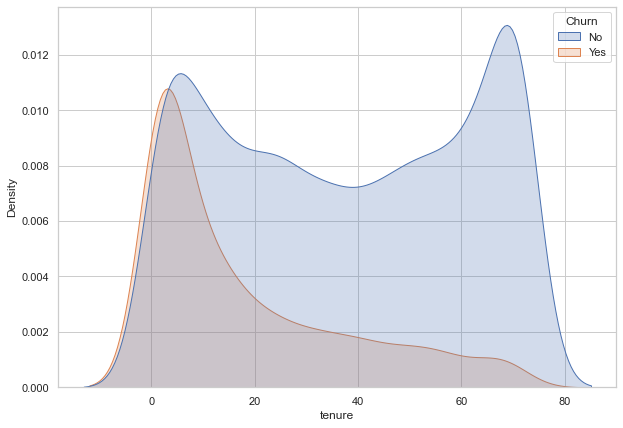

In [52]:
plt.figure(figsize=(10,7))
sns.kdeplot(x='tenure', hue='Churn',data = df, shade= True)
plt.show()

In [53]:
print("Mean Monthly Charge of Not-Churned:", df1.tenure.mean())
print("Mean Monthly Charge of Churned:", df2.tenure.mean())

Mean Monthly Charge of Not-Churned: 37.56996521066873
Mean Monthly Charge of Churned: 17.979133226324237


In [54]:
ttest,pval = ttest_ind(df1['tenure'],df2['tenure'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis: not enough evidence to conclude that population means are the same.")
else:
  print("we accept null hypothesis: enough evidence to conclude that population means are the same.")

p-value 7.99905796059022e-205
we reject null hypothesis: not enough evidence to conclude that population means are the same.


In [55]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Key findings from the EDA:
  1. Most of the customers tend to use fiber optic for internet. Among the churned customers as well, most of them have used 
       fiber optic
  2. Month-to-month contract seem to be popular among both churned and not-churned customers.
  3. Customers who churned has used the services only for a short period of time.
  4. High positive correlation is present between tenure and Total charges. Look reasonable not to use the "TotalCharges"     variable in further steps as it shows a correlation with monthly charges as well even though it is not as strong as with tenure.
  5. Majority of the cutomers who did not churn seem to have partners whereas those who churned does not seem to have partners.

#### Data Pre-processing

Steps for Data Pre-processing include:
1. Feature Engineering: For example, here we have monthly service charges. If we want to look at annual service charges, we just have to multiply this field by 12 and create a new field to store the data. Question is, "is it going to help for the business problem we are trying to solve?"
  
  
2. Feature Preprocessing: Transforming the categorical variables into numerical variables. Most ML learning models need numerical fields as tthe inputs. Thus, this is an important step. Few of the ways to tranform the categorical variables are, label encoding, one-hot encoding, target encoding. Also, note that there are some ML models which can be dealt with categorocal variable on its own (some examples are LightGBM, CatBoost)
   
   
3. Feature Scaling: By scaling the features, we can shrink the spaces the model is working and as a result the models we use could be more efficient.
   Few of the scaling techniques are,
    
    -Absolute Maximum Scaling: divide all values by the absolute maximum (all the values will be between -1 and 1)
    
    -Min-Max Scaling: substract ech value by minimum annd divide by the range(max-min) (all values will be between 0 and 1)
    
    -Normalization: substract by mean and divide by the range.
    
    -Standardization: substract by mean and divide by standard deviation (good one to use if the feature is normally distributed)
 
 
4. Splitting the dataset into training and testing sets.

    -split percentage
    
    -the use of a random seed
    
    -need of stratification (check!)
 
 
5. Choosing the baseline model and performance metrics to evauate the model. For classification problems, we normally use logistic regression, for regressions we use linear regression, for unsupervised problems we use k-means algorithms. In this case, it will be a logistic regression and the commonly used evaluation metrics are accuracy, precision, recall, F1 score.
    
Think about overfitting due to imbalance data (resample), hyper-parameter tuning, cross-validation. 

In [56]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

##### Encode Categorical Variables

In this step, we wil use Pandas Get dummies moethod to turn all the categorical variables in to dummy indicator variables and drop the first column. For example, we have "Yes" and "No" for Partner field. After creating dummy variables, we have only one field for Partner, which is "Partner_Yes" with 1 and 0 values. This seem to be a popular method in encoding categorical variables.

In [57]:
cat_var = df[['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
num_var = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [58]:
cat_var_new = pd.get_dummies(cat_var, drop_first = True)

In [59]:
df_new = pd.concat([cat_var_new, num_var], axis =1)
df_new.head()

,SeniorCitizen,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,29.85,29.85
1,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,34,56.95,1889.50
2,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,1,2,53.85,108.15
3,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,2,70.70,151.65


##### Generate Training and Test Datasets 

We take 20% of our dataset to be the test set and the rest to train the model. using the random_state we can fix the test set we obtain every time we run the cell. stratify (check!)

In [60]:
from sklearn.model_selection import train_test_split

y = df_new['Churn_Yes']
X = df_new[['SeniorCitizen', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure', 'MonthlyCharges', 'TotalCharges']]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 123, stratify = y)
print('Number of records on X_train: ', X_train.shape )
print('Number of records on y_train: ', y_train.shape )
print('Number of records on X_test: ', X_test.shape )
print('Number of records on y_test: ', y_test.shape )

Number of records on X_train:  (5634, 29)
Number of records on y_train:  (5634,)
Number of records on X_test:  (1409, 29)
Number of records on y_test:  (1409,)


##### Feature Scaling 

Standardization is being used as the feature scaling technique. Each field in the X_train is substracted by the mean and divided by the standard deviation, same for the X_test data set. I guess I could do standardization only for "tenure", "MonthlyCharges", and "TotalCharges" since they are the fields with larger variation. Would it make any difference?  

In [62]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_train_new = pd.DataFrame(SS.fit_transform(X_train))
X_train_new.columns = X_train.columns.values
X_train_new.index = X_train.index.values
X_train = X_train_new

X_test_new = pd.DataFrame(SS.fit_transform(X_test))
X_test_new.columns = X_test.columns.values
X_test_new.index = X_test.index.values
X_test = X_test_new

##### Baseline Model: Logistic Regression

As the baseline model, we will use logistic regression.
For the evaluation metrics following are considered:
1. Classificaion Accuracy: Number of correct predictions made as a ration of all predictions made. Only suitable when there are equal number of observations in each class.
2. Log Loss: Evaluate the predictions of probabilities of membership to a given class. Smaller log loss is better with 0 representing a perfect log loss.
3. Area Under ROC curve (ROC AUC): represents the model ability to discriminate between two classes. An area of 1 represents a model that predicts perfectly. An area of 0.5 represents a model as good.
4. Confusion Matrix
5. Classification Report

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

from sklearn.metrics import roc_curve, accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn import metrics


lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

kfold = model_selection.KFold(n_splits = 5 , random_state =5, shuffle= True)
results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
print('Classification Accuracy is %.3f(%.3f)' %(results.mean(), results.std()))

Classification Accuracy is 0.803(0.006)


In [85]:
results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring='neg_log_loss')
print('Log Loss is %.3f(%.3f)' %(results.mean(), results.std()))

Log Loss is -0.418(0.007)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.845


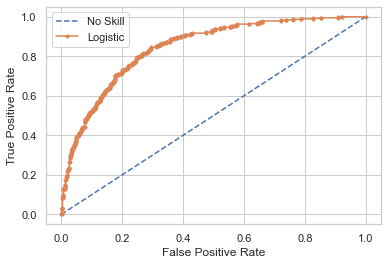

In [87]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

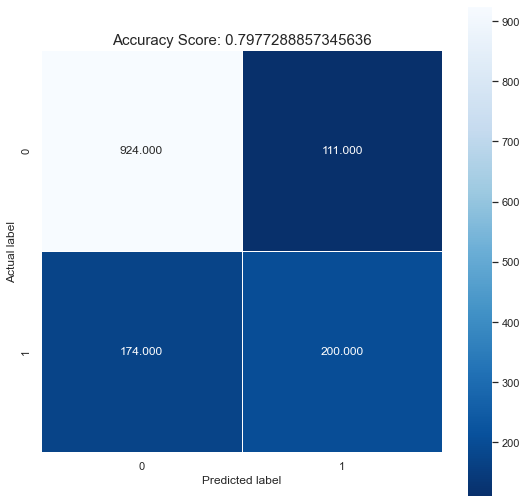

In [89]:
cm = confusion_matrix(y_test, lr.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [82]:
print("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test, lr.predict(X_test)))

Logistic Regression AUC = 0.84
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



Observing all the metrics, it looks like the logistic regression is actually a good model for this data. However, as we have an imbalanced data set this could be due to overfitting.